<a href="https://colab.research.google.com/github/pallavibekal/IISC---Neural-Networks/blob/main/2200092_Image_Classification_MLP_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Image Classification using Multi Layer Perceptron

## Learning Objectives

At the end of the experiment, you will be able to :

* load and extract features of images

* implement the Multi-Layer perceptron to classify images

* implement simple neural network from keras

## Introduction

Traffic sign recognition is a challenging, real-world problem relevant for AI based transportation systems. Traffic signs show a wide range of variations between classes in terms of color, shape, and the presence of pictograms or text. However, there exist subsets of
classes (e.g., speed limit signs) that are very similar to each other. Further, the classifier
has to be robust against large variations in visual appearances due to changes in illumination, partial
occlusions, rotations, weather conditions etc. Using a comprehensive traffic sign detection dataset, here we will perform classification of traffic signs, train and evaluate the different models and compare to the performance of MLPs.

![img](https://paperswithcode.com/media/datasets/GTSRB-0000000633-9ce3c5f6_Dki5Rsf.jpg)

## Dataset

The data for this mini-project is from the German Traffic Sign Detection Benchmark [GTSDB](https://benchmark.ini.rub.de/gtsdb_dataset.html). This archive contains the training set used during the IJCNN 2013 competition. 

The German Traffic Sign Detection Benchmark is a single-image detection assessment for researchers with interest in the field of computer vision, pattern recognition and image-based driver assistance. It is introduced on the IEEE International Joint Conference on Neural Networks 2013. 

It features ...

* The main archive FullIJCNN2013.zip includes the images (1360 x 800 pixels) in PPM format, the image sections containing only the traffic signs
* A file in CSV format with the ground truth
* A ReadMe.txt with more details.

## Problem Statement

To build and improve upon a machine learning model for the classification of images and achieve a high accuracy final model.

## Grading = 10 Points

In [1]:
#@title Download the data
!wget -qq https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
!unzip -qq FullIJCNN2013.zip

### Import Required packages

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from skimage.io import imread, imshow
from sklearn import preprocessing
import os, glob
from PIL import Image
from sklearn.model_selection import GridSearchCV
# Keras
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

### Data Loading and Feature Extraction (2 points)

#### Get the features and labels of data

* Extract the features of the images
* Extract labels of the images
* Resize the images to (30, 30) and convert to numpy 1-D array

   Hint: [Link](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)

In [3]:
import PIL
print('Pillow Version:', PIL.__version__)

Pillow Version: 7.1.2


In [6]:
# load and show an image with Pillow
from PIL import Image
# load the image
image = Image.open('/content/FullIJCNN2013/00/00000.ppm')
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# show the image
image.show()

PPM
RGB
(30, 30)


uint8
(30, 30, 3)


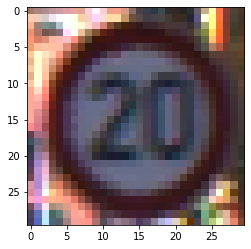

In [5]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
data = image.imread('/content/FullIJCNN2013/00/00000.ppm')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

In [6]:
# load image and convert to and from NumPy array
from PIL import Image
from numpy import asarray
# load the image
image = Image.open('/content/FullIJCNN2013/00/00000.ppm')
# convert image to numpy array
data = asarray(image)
# summarize shape
print(data.shape)
# create Pillow image
image2 = Image.fromarray(data)
# summarize image details
print(image2.format)
print(image2.mode)
print(image2.size)

(30, 30, 3)
None
RGB
(30, 30)


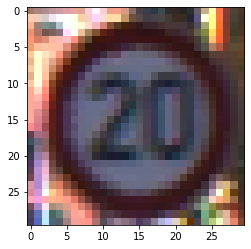

In [7]:
pyplot.imshow(image2)
pyplot.show()

In [4]:
#1. Extract the features of the images
#2. Extract labels of the images
#3. Resize the images to (30, 30) and convert to numpy 1-D array

data = []
flat_data = []
labels = []
classes = 43

for i in range(classes):
  if(i<=9):
    path = os.path.join(os.getcwd(),'FullIJCNN2013',str('0' + str(i)))
    images = os.listdir(path)
  else:
    path = os.path.join(os.getcwd(),'FullIJCNN2013',str(i))
    images = os.listdir(path)

  for j in images:
    try:
      image = Image.open(path + '/'+ j)
      image = image.resize((30,30))
      image = np.array(image)
      data.append(image)
      flat_data.append(image.flatten())
      labels.append(i)
    except:
      print("Error loading image")#Converting lists into numpy arrays bcoz its faster and takes lesser #memorydata = np.array(data)

# Convert to numpy array
data = np.array(data)
flat_data = np.array(flat_data)
labels = np.array(labels)


In [5]:
print(data.shape,flat_data.shape)

(1213, 30, 30, 3) (1213, 2700)


In [6]:
print(labels.shape)

(1213,)


### Data Exploration and Preprocessing ( 2 points)

#### Plot the sample image of each class

Hint: plt.subplot

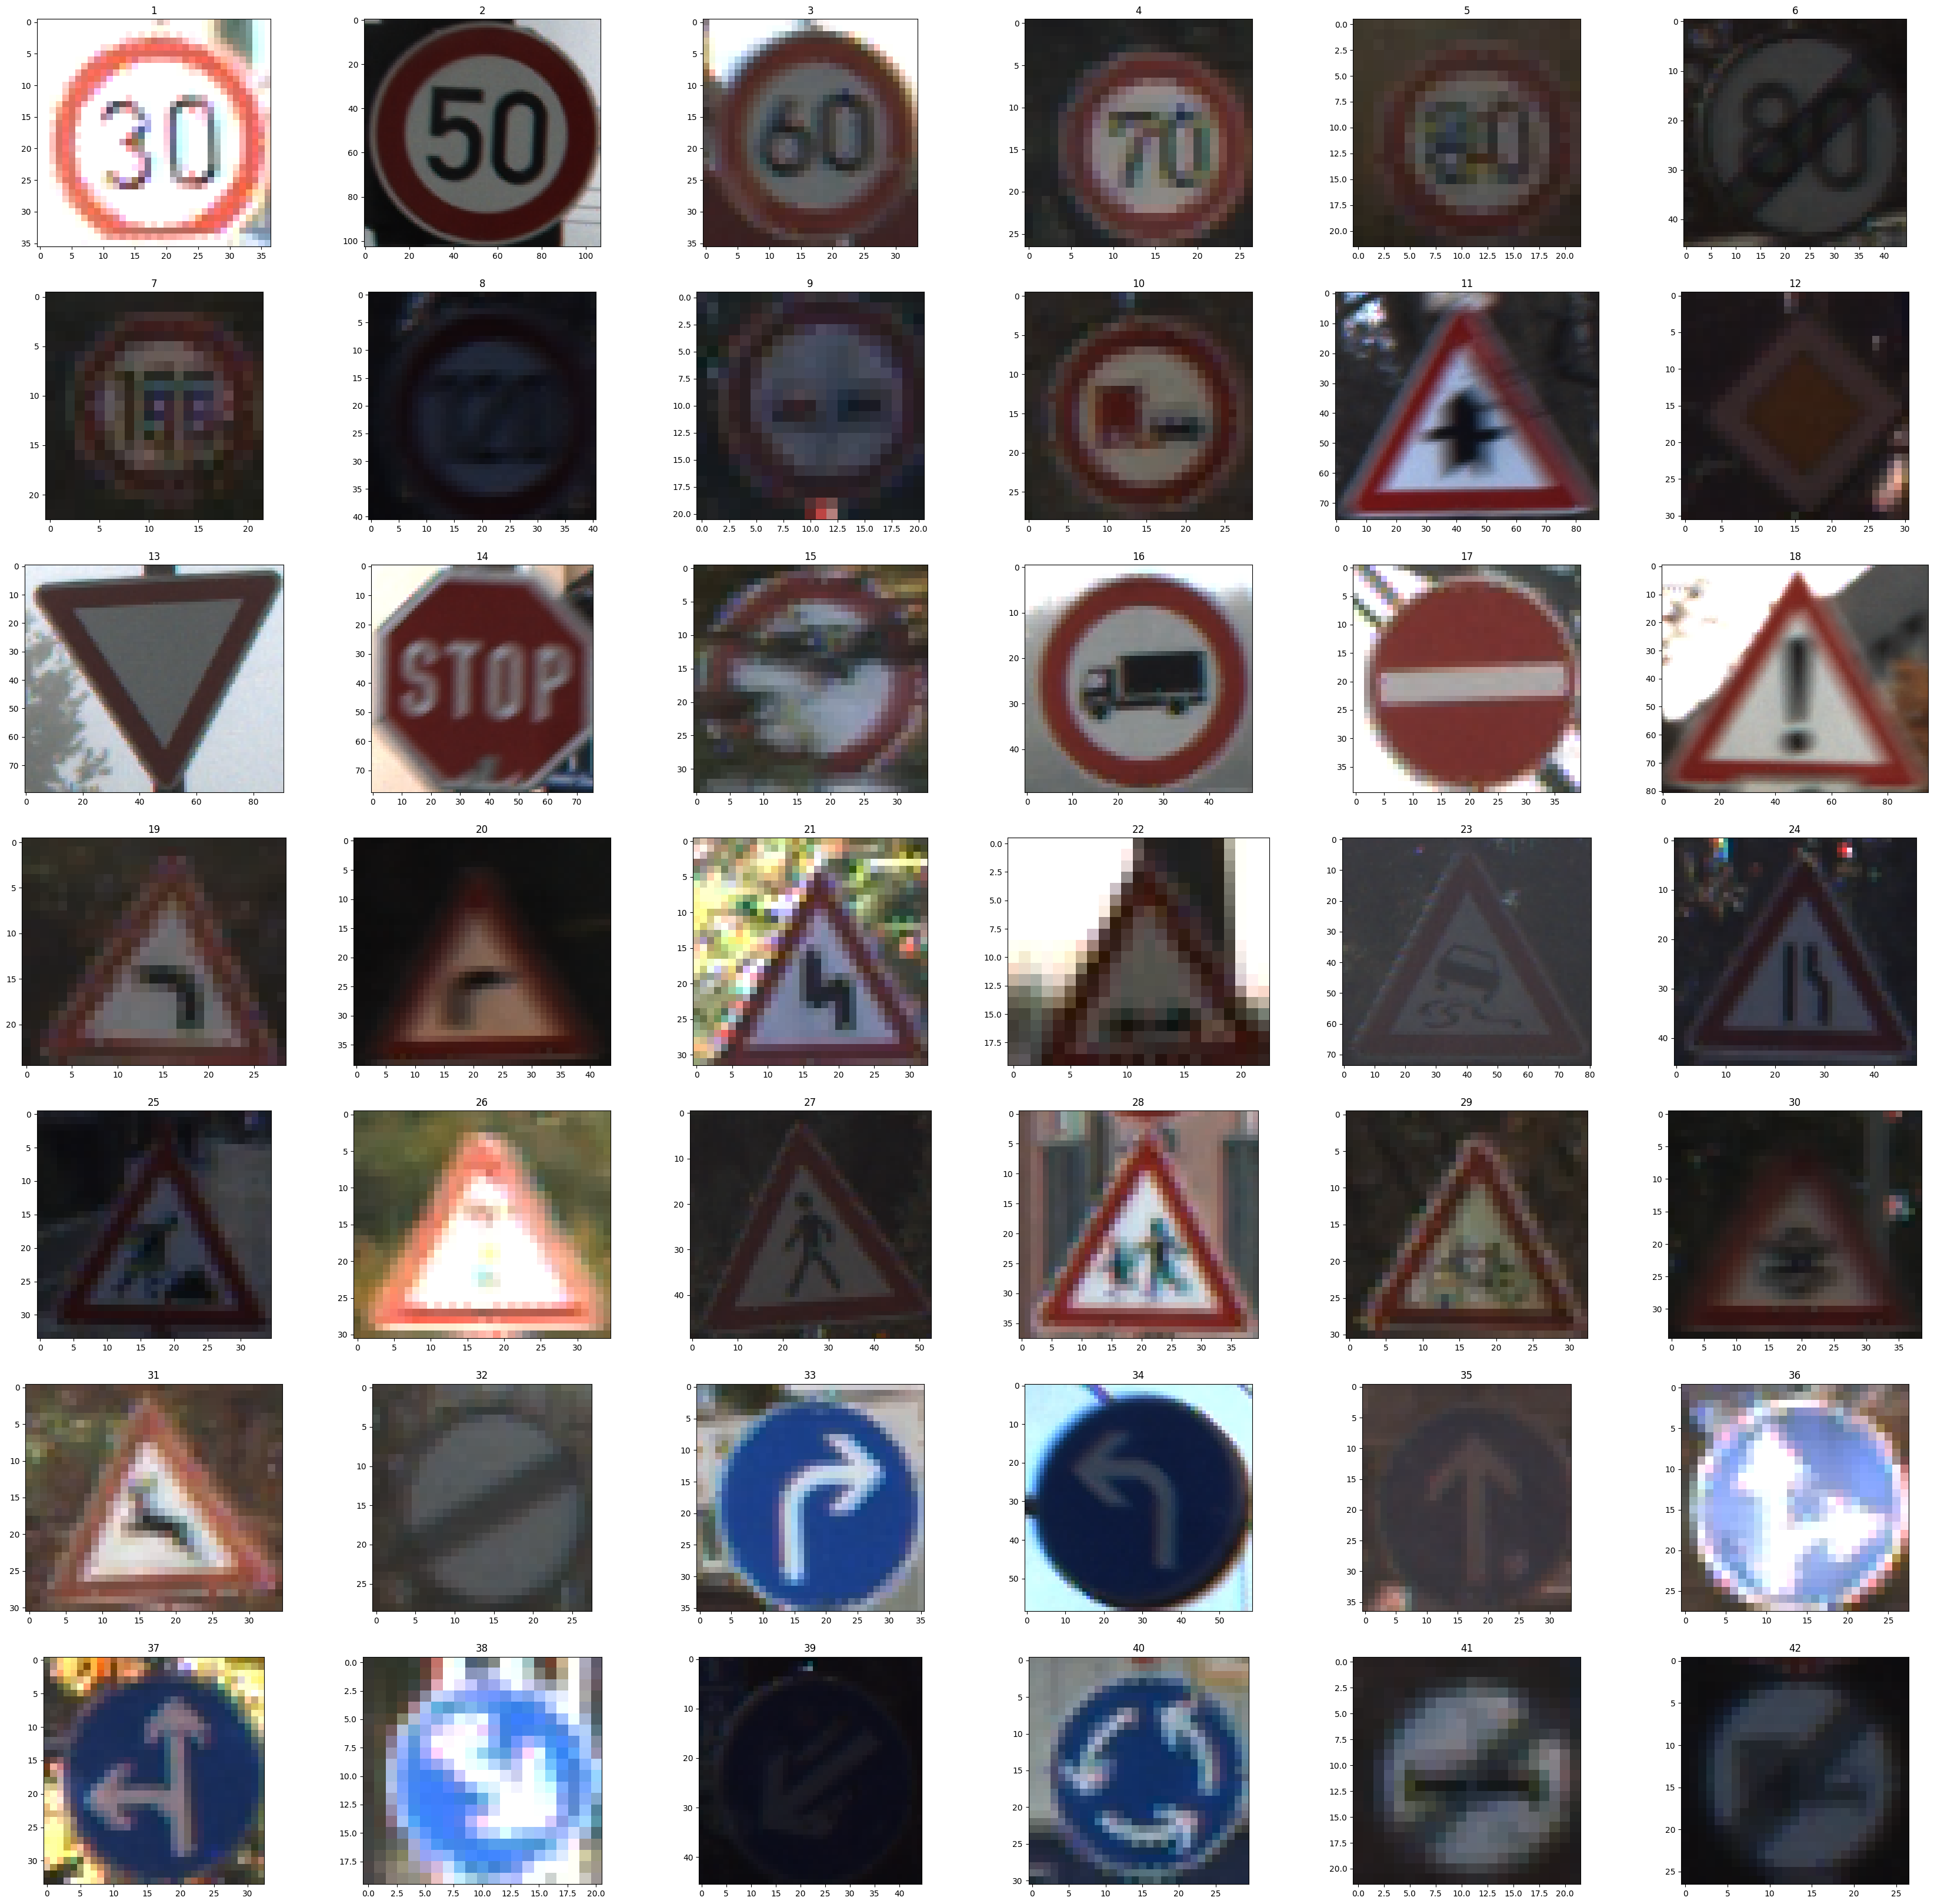

In [81]:
# YOUR CODE HERE
import random
sample_path = []
fig = plt.figure(figsize=(42, 42), dpi=100)

for i in range(1,43):
  if(i<=9):
    path = os.path.join(os.getcwd(),'FullIJCNN2013',str('0' + str(i)))
    images = os.listdir(path)
  else:
    path = os.path.join(os.getcwd(),'FullIJCNN2013',str(i))
    images = os.listdir(path)
    
  j = random.choice(images)
  sample_path.append(path + '/'+ j)

counter = 1
for val in sample_path:
  image = Image.open(val)
  ax1 = plt.subplot(7,6, counter)
  ax1.set_title(counter)
  ax1.imshow(image)
  counter = counter + 1

#### Plot the distribution of Classes

In [76]:
df = pd.DataFrame(flat_data)

In [77]:
df['Labels'] = labels

In [79]:
df['Labels'].value_counts()

38    88
12    85
13    83
2     81
10    80
1     79
4     68
8     57
5     53
9     41
7     41
11    38
18    38
14    32
25    31
3     30
17    29
23    20
35    20
6     19
26    18
30    16
33    16
15    15
28    14
22    13
34    12
42    11
40    10
20     9
36     9
32     8
16     8
41     7
39     6
21     5
24     5
29     5
0      4
27     3
19     2
31     2
37     2
Name: Labels, dtype: int64

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Frequency Histogram of Images Classes')]

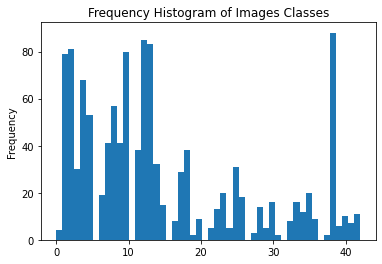

In [80]:
plt.hist(df["Labels"],bins=50)
plt.gca().set(title='Frequency Histogram of Images Classes', ylabel='Frequency')

#### Normalize the features

For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values.

Hint: sklearn.preprocessing.normalize

In [7]:
data = np.array(data)/255
flat_data = preprocessing.normalize(flat_data)


In [8]:
flat_data.shape

(1213, 2700)

### Train the MLP classifier on features (1 point)

* Split the data into train and test

* Train the MLP classifier with different parameters

* Get the accuracy score and performance metrics

In [9]:
# Get two sets of trains and test for data plus flat data

X_train, X_test, Y_train, Y_test = train_test_split(data,labels,test_size=0.2,random_state=42, shuffle=True)


X_train_flat, X_test_flat, Y_train_flat, Y_test_flat = train_test_split(flat_data,labels,test_size=0.2,random_state=42, shuffle=True)

In [68]:
# 1 MLP Classifier
clf = MLPClassifier(random_state=1, learning_rate_init = 0.01,max_iter=300).fit(X_train_flat, Y_train_flat)

In [69]:
Y_pred_MLP1 = clf.predict(X_test_flat)

In [70]:
from sklearn.metrics import accuracy_score
print('Accuracy Score-',accuracy_score(Y_pred_MLP1,Y_test))

Accuracy Score- 0.8930041152263375


In [71]:
# 2 MLP Classifier
clf_MLP2 = MLPClassifier(learning_rate_init=0.01,hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=200)

In [72]:
clf_MLP2.fit(X_train_flat,Y_train_flat)

MLPClassifier(hidden_layer_sizes=(64, 64, 64), learning_rate_init=0.01,
              random_state=1)

In [73]:
Y_pred_MLP2=clf_MLP2.predict(X_test_flat)
print('Accuracy Score-',accuracy_score(Y_pred_MLP2,Y_test))

Accuracy Score- 0.6790123456790124


### Tune the hyper-parameters (2 points)

* Use the GridSearchCV or RandomizedSearchCV and select best parameters

  Hint: [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

  (or)
* Manually change and find the best parameters

To know about all the parameters, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [25]:
# 3 MLP Classifier with gridsearch
from sklearn.model_selection import GridSearchCV
MLP_grid = MLPClassifier(max_iter=300)
parameter_space = {
    'hidden_layer_sizes': [(500,100,30),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(MLP_grid, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train_flat, Y_train_flat) 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=300), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [26]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'adam'}


{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'adam'}

In [27]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.081 (+/-0.004) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'sgd'}
0.711 (+/-0.024) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}
0.081 (+/-0.004) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.663 (+/-0.115) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.081 (+/-0.004) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.785 (+/-0.061) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}
0.078 (+/-0.012) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.786 (+/-0.047) 

In [28]:
y_true, y_pred = Y_test_flat , clf.predict(X_test_flat)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           1       0.70      0.88      0.78        16
           2       0.74      0.88      0.80        16
           3       0.50      0.50      0.50         6
           4       1.00      0.87      0.93        15
           5       0.78      0.50      0.61        14
           6       0.86      1.00      0.92         6
           7       0.89      0.89      0.89         9
           8       0.86      0.86      0.86        14
           9       1.00      1.00      1.00        11
          10       0.94      1.00      0.97        16
          11       0.85      0.92      0.88        12
          12       0.90      1.00      0.95        18
          13       1.00      1.00      1.00        15
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         4
  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results on the test set:
              precision    recall  f1-score   support

           1       0.70      0.88      0.78        16
           2       0.74      0.88      0.80        16
           3       0.50      0.50      0.50         6
           4       1.00      0.87      0.93        15
           5       0.78      0.50      0.61        14
           6       0.86      1.00      0.92         6
           7       0.89      0.89      0.89         9
           8       0.86      0.86      0.86        14
           9       1.00      1.00      1.00        11
          10       0.94      1.00      0.97        16
          11       0.85      0.92      0.88        12
          12       0.90      1.00      0.95        18
          13       1.00      1.00      1.00        15
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         4
          18       0.67      1.00      0.80         6
          20       0.00      0.00      0.00         2
          21       0.00      0.00      0.00         3
          22       1.00      1.00      1.00         4
          23       0.40      0.50      0.44         4
          24       0.00      0.00      0.00         2
          25       0.67      0.80      0.73         5
          26       0.33      0.25      0.29         4
          28       0.67      1.00      0.80         2
          29       0.00      0.00      0.00         2
          30       1.00      1.00      1.00         2
          32       0.00      0.00      0.00         2
          33       1.00      1.00      1.00         3
          34       1.00      1.00      1.00         1
          35       0.88      1.00      0.93         7
          36       0.00      0.00      0.00         1
          38       0.90      1.00      0.95         9
          41       0.00      0.00      0.00         1
          42       0.67      0.67      0.67         3

    accuracy                           0.84       243
   macro avg       0.67      0.71      0.69       243
weighted avg       0.80      0.84      0.81       243

#### Try the different algorithms and compare the results with MLP classifier

### SVM Model Experiments

In [36]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

In [37]:
model.fit(X_train_flat,Y_train_flat)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


The Model is trained well with the given images


In [38]:
model.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [40]:
svc = svm.SVC(C=100,gamma=0.001,kernel='rbf')

In [ ]:
model.fit(X_train_flat,Y_train_flat)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


In [45]:
Y_pred_svc=model.predict(X_test_flat)
print('Accuracy Score-',accuracy_score(Y_pred_svc,Y_test))


Accuracy Score- 0.8106995884773662


In [ ]:
# XGBoost Classifier

In [110]:
import xgboost as xgb
from xgboost import XGBClassifier

In [111]:
xgb = XGBClassifier()

In [114]:
xgb.fit(X_train_flat, Y_train_flat)

XGBClassifier(objective='multi:softprob')

In [115]:
y_pred = xgb.predict(X_test_flat)
accuracy = accuracy_score(Y_test_flat, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.72%


In [118]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, n_jobs=-1,
                             max_depth=20, max_samples=0.05)
clf.fit(X_train_flat, Y_train_flat)
clf.score(X_test_flat, Y_test)

0.45267489711934156

### Implement simple Neural Networks using keras (3 points)

* Define the keras model and initialize the layers
  - Ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.
* Compile the model
  - Specify the loss function (to evaluate a set of weights), the optimizer (is used to search through different weights for the network) and any optional metrics to collect and report during training.
* Fit and Evaluate the model
  - Fit the data by specifying epochs and evaluate the model

In [52]:

from tensorflow.keras.layers import Flatten, Dense
model = Sequential([
                    Flatten(input_shape=[30, 30,3]),
                    Dense(300, activation="relu"),
                    Dense(100, activation="relu"),
                    Dense(43, activation="softmax")
                    ])

In [53]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 2700)              0         
                                                                 
 dense_26 (Dense)            (None, 300)               810300    
                                                                 
 dense_27 (Dense)            (None, 100)               30100     
                                                                 
 dense_28 (Dense)            (None, 43)                4343      
                                                                 
Total params: 844,743
Trainable params: 844,743
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Compile model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"]
              )

In [55]:
history = model.fit(X_train, Y_train, epochs=30, validation_data = (X_test, Y_test))

Epoch 1/30
31/31 [==============================] - 1s 14ms/step - loss: 3.3965 - accuracy: 0.1753 - val_loss: 2.9985 - val_accuracy: 0.2346
Epoch 2/30
31/31 [==============================] - 0s 9ms/step - loss: 2.6953 - accuracy: 0.3546 - val_loss: 2.6190 - val_accuracy: 0.3333
Epoch 3/30
31/31 [==============================] - 0s 11ms/step - loss: 2.2801 - accuracy: 0.4381 - val_loss: 2.2413 - val_accuracy: 0.4321
Epoch 4/30
31/31 [==============================] - 0s 10ms/step - loss: 1.9563 - accuracy: 0.4907 - val_loss: 2.0282 - val_accuracy: 0.3992
Epoch 5/30
31/31 [==============================] - 0s 10ms/step - loss: 1.7317 - accuracy: 0.5598 - val_loss: 1.9214 - val_accuracy: 0.4444
Epoch 6/30
31/31 [==============================] - 0s 12ms/step - loss: 1.5302 - accuracy: 0.5887 - val_loss: 1.7327 - val_accuracy: 0.5103
Epoch 7/30
31/31 [==============================] - 0s 12ms/step - loss: 1.3766 - accuracy: 0.6423 - val_loss: 1.5782 - val_accuracy: 0.5761
Epoch 8/30
31/

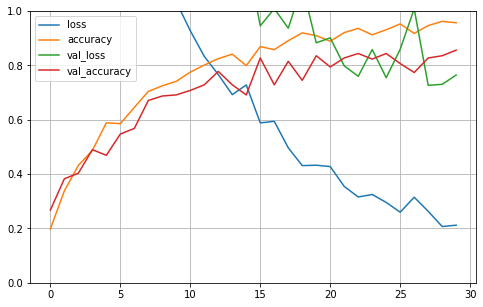

In [33]:
# Visualize training and validation metrics
df = pd.DataFrame(history.history)
df.plot(figsize=(8, 5))
plt.grid(True)
# set the vertical range to [0-1]
plt.gca().set_ylim(0, 1) 
plt.show()

In [56]:
# predict the outcomes
y_predict = model.predict(X_test)
loss,score = model.evaluate(X_test, Y_test)
# displaying the score
print(score)

8/8 [==============================] - 0s 4ms/step - loss: 0.8018 - accuracy: 0.8148
0.8148148059844971


In [ ]:
# Step 1 - Build the architecture
# YOUR CODE HERE

In [ ]:
# Step 2 - Compile the model
# YOUR CODE HERE

In [ ]:
y_pred = np.argmax(y_predict, axis=1)

In [67]:
# Step 3 - Fit and Evaluate the model
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(Y_test, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           1       1.00      0.38      0.55        16
           2       0.65      0.94      0.77        16
           3       0.57      0.67      0.62         6
           4       1.00      0.87      0.93        15
           5       0.81      0.93      0.87        14
           6       1.00      0.83      0.91         6
           7       0.67      0.89      0.76         9
           8       0.89      0.57      0.70        14
           9       1.00      0.91      0.95        11
          10       0.89      1.00      0.94        16
          11       0.92      0.92      0.92        12
          12       0.89      0.89      0.89        18
          13       1.00      1.00      1.00        15
          14       1.00      1.00      1.00         6
          15       0.25      1.00      0.40         1
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         4
  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
# - Using parameters from random search

In [103]:

from tensorflow.keras.layers import Flatten, Dense
model = Sequential([
                    Flatten(input_shape=[30, 30,3]),
                    Dense(10, activation="relu"),
                    Dense(10, activation="relu"),
                    Dense(43, activation="softmax")
                    ])

In [104]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 2700)              0         
                                                                 
 dense_35 (Dense)            (None, 10)                27010     
                                                                 
 dense_36 (Dense)            (None, 10)                110       
                                                                 
 dense_37 (Dense)            (None, 43)                473       
                                                                 
Total params: 27,593
Trainable params: 27,593
Non-trainable params: 0
_________________________________________________________________


In [105]:
from tensorflow.keras.optimizers import SGD
optimizer = SGD(0.003)

In [106]:
# Compile model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"]
              )

In [107]:
history = model.fit(X_train, Y_train, epochs=30, validation_data = (X_test, Y_test))

Epoch 1/30
31/31 [==============================] - 1s 9ms/step - loss: 3.7571 - accuracy: 0.0309 - val_loss: 3.7670 - val_accuracy: 0.0494
Epoch 2/30
31/31 [==============================] - 0s 4ms/step - loss: 3.7487 - accuracy: 0.0608 - val_loss: 3.7602 - val_accuracy: 0.0617
Epoch 3/30
31/31 [==============================] - 0s 5ms/step - loss: 3.7425 - accuracy: 0.0608 - val_loss: 3.7567 - val_accuracy: 0.0617
Epoch 4/30
31/31 [==============================] - 0s 4ms/step - loss: 3.7362 - accuracy: 0.0649 - val_loss: 3.7511 - val_accuracy: 0.0576
Epoch 5/30
31/31 [==============================] - 0s 4ms/step - loss: 3.7287 - accuracy: 0.0680 - val_loss: 3.7423 - val_accuracy: 0.0782
Epoch 6/30
31/31 [==============================] - 0s 3ms/step - loss: 3.7175 - accuracy: 0.0773 - val_loss: 3.7323 - val_accuracy: 0.0741
Epoch 7/30
31/31 [==============================] - 0s 4ms/step - loss: 3.7082 - accuracy: 0.0773 - val_loss: 3.7295 - val_accuracy: 0.0741
Epoch 8/30
31/31 [==

#### Try the same parameters used for MLP Classifier and build the keras model

In [1]:
# {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive',
# 'solver': 'adam'}

In [13]:
from tensorflow.keras.layers import Flatten, Dense
model_MLP = Sequential([
                    Flatten(input_shape=[30, 30,3]),
                    Dense(20, activation="tanh"),
                    Dense(20, activation="tanh"),
                    Dense(43, activation="softmax")
                    ])

In [14]:
model_MLP.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2700)              0         
                                                                 
 dense_3 (Dense)             (None, 20)                54020     
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 43)                903       
                                                                 
Total params: 55,343
Trainable params: 55,343
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile model
model_MLP.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"]
              )

In [20]:
history = model_MLP.fit(X_train, Y_train, epochs=30, validation_data = (X_test, Y_test))

Epoch 1/30
31/31 [==============================] - 1s 9ms/step - loss: 0.8104 - accuracy: 0.8258 - val_loss: 0.9503 - val_accuracy: 0.7901
Epoch 2/30
31/31 [==============================] - 0s 4ms/step - loss: 0.7092 - accuracy: 0.8629 - val_loss: 0.9582 - val_accuracy: 0.8025
Epoch 3/30
31/31 [==============================] - 0s 4ms/step - loss: 0.6965 - accuracy: 0.8588 - val_loss: 0.8958 - val_accuracy: 0.8025
Epoch 4/30
31/31 [==============================] - 0s 5ms/step - loss: 0.6613 - accuracy: 0.8670 - val_loss: 0.9473 - val_accuracy: 0.7613
Epoch 5/30
31/31 [==============================] - 0s 4ms/step - loss: 0.6236 - accuracy: 0.8784 - val_loss: 0.8424 - val_accuracy: 0.8189
Epoch 6/30
31/31 [==============================] - 0s 4ms/step - loss: 0.5927 - accuracy: 0.8866 - val_loss: 0.8310 - val_accuracy: 0.8189
Epoch 7/30
31/31 [==============================] - 0s 4ms/step - loss: 0.5549 - accuracy: 0.8948 - val_loss: 0.8155 - val_accuracy: 0.8313
Epoch 8/30
31/31 [==

In [21]:
# predict the outcomes
y_predict = model_MLP.predict(X_test)
loss,score = model_MLP.evaluate(X_test, Y_test)
# displaying the score
print(score)

8/8 [==============================] - 0s 3ms/step - loss: 0.5774 - accuracy: 0.8642
0.8641975522041321


In [ ]:
y_pred = np.argmax(y_predict, axis=1)

In [ ]:
# Step 3 - Fit and Evaluate the model
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(Y_test, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           1       1.00      0.38      0.55        16
           2       0.65      0.94      0.77        16
           3       0.57      0.67      0.62         6
           4       1.00      0.87      0.93        15
           5       0.81      0.93      0.87        14
           6       1.00      0.83      0.91         6
           7       0.67      0.89      0.76         9
           8       0.89      0.57      0.70        14
           9       1.00      0.91      0.95        11
          10       0.89      1.00      0.94        16
          11       0.92      0.92      0.92        12
          12       0.89      0.89      0.89        18
          13       1.00      1.00      1.00        15
          14       1.00      1.00      1.00         6
          15       0.25      1.00      0.40         1
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         4
  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Experiment using Dropout, Regularization and Batch Normalization

In [32]:
model = keras.models.Sequential([
      keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=[30,30,3]),
      keras.layers.MaxPooling2D(pool_size=(2, 2)),
      keras.layers.Flatten(input_shape=(33,33)),
      keras.layers.Dense(units=256, activation='relu'),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(units=43, activation='softmax')
])

In [33]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
history = model.fit(X_train, Y_train, epochs=30, validation_data = (X_test, Y_test))

Epoch 1/30
31/31 [==============================] - 2s 46ms/step - loss: 3.1387 - accuracy: 0.2474 - val_loss: 2.6170 - val_accuracy: 0.4362
Epoch 2/30
31/31 [==============================] - 1s 40ms/step - loss: 2.2078 - accuracy: 0.4835 - val_loss: 1.9149 - val_accuracy: 0.5473
Epoch 3/30
31/31 [==============================] - 1s 41ms/step - loss: 1.5643 - accuracy: 0.6330 - val_loss: 1.4694 - val_accuracy: 0.6379
Epoch 4/30
31/31 [==============================] - 1s 41ms/step - loss: 1.1264 - accuracy: 0.7299 - val_loss: 1.1027 - val_accuracy: 0.7778
Epoch 5/30
31/31 [==============================] - 1s 40ms/step - loss: 0.8309 - accuracy: 0.8134 - val_loss: 0.9677 - val_accuracy: 0.7860
Epoch 6/30
31/31 [==============================] - 1s 41ms/step - loss: 0.6589 - accuracy: 0.8423 - val_loss: 0.7624 - val_accuracy: 0.8313
Epoch 7/30
31/31 [==============================] - 1s 40ms/step - loss: 0.5032 - accuracy: 0.8825 - val_loss: 0.6872 - val_accuracy: 0.8477
Epoch 8/30
31

In [35]:
# predict the outcomes
y_predict = model.predict(X_test)
loss,score = model.evaluate(X_test, Y_test)
# displaying the score
print(score)

8/8 [==============================] - 0s 12ms/step - loss: 0.3729 - accuracy: 0.9342
0.9341563582420349


In [ ]:
y_pred = np.argmax(y_predict, axis=1)

In [ ]:
# Step 3 - Fit and Evaluate the model
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(Y_test, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           1       1.00      0.38      0.55        16
           2       0.65      0.94      0.77        16
           3       0.57      0.67      0.62         6
           4       1.00      0.87      0.93        15
           5       0.81      0.93      0.87        14
           6       1.00      0.83      0.91         6
           7       0.67      0.89      0.76         9
           8       0.89      0.57      0.70        14
           9       1.00      0.91      0.95        11
          10       0.89      1.00      0.94        16
          11       0.92      0.92      0.92        12
          12       0.89      0.89      0.89        18
          13       1.00      1.00      1.00        15
          14       1.00      1.00      1.00         6
          15       0.25      1.00      0.40         1
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         4
  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
# Regularization

In [30]:

from tensorflow.keras.layers import Flatten, Dense, Dropout
model_REG = Sequential([
                    Flatten(input_shape=[30, 30,3]),
                    Dense(20, activation='tanh'),
                    #Dense(100, activation="relu",kernel_regularizer=keras.regularizers.l1()),
                    Dense(100, activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
                    #Dense(100, activation="relu",kernel_regularizer=keras.regularizers.l1_l2(0.01)),
                    Dropout(0.2),
                    Dense(43, activation="softmax")
                    ])

In [27]:
model_REG.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 2700)              0         
                                                                 
 dense_10 (Dense)            (None, 20)                54020     
                                                                 
 dense_11 (Dense)            (None, 100)               2100      
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_12 (Dense)            (None, 43)                4343      
                                                                 
Total params: 60,463
Trainable params: 60,463
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compile model
model_REG.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"]
              )

In [29]:
history = model_REG.fit(X_train, Y_train, epochs=30, validation_data = (X_test, Y_test))

Epoch 1/30
31/31 [==============================] - 1s 10ms/step - loss: 5.9550 - accuracy: 0.0856 - val_loss: 5.5536 - val_accuracy: 0.0823
Epoch 2/30
31/31 [==============================] - 0s 4ms/step - loss: 5.2241 - accuracy: 0.1505 - val_loss: 4.9591 - val_accuracy: 0.1934
Epoch 3/30
31/31 [==============================] - 0s 4ms/step - loss: 4.6876 - accuracy: 0.2103 - val_loss: 4.4811 - val_accuracy: 0.2634
Epoch 4/30
31/31 [==============================] - 0s 4ms/step - loss: 4.2110 - accuracy: 0.2608 - val_loss: 4.0704 - val_accuracy: 0.2716
Epoch 5/30
31/31 [==============================] - 0s 4ms/step - loss: 3.8134 - accuracy: 0.3227 - val_loss: 3.6944 - val_accuracy: 0.2963
Epoch 6/30
31/31 [==============================] - 0s 4ms/step - loss: 3.4591 - accuracy: 0.3505 - val_loss: 3.3847 - val_accuracy: 0.3251
Epoch 7/30
31/31 [==============================] - 0s 4ms/step - loss: 3.1983 - accuracy: 0.3814 - val_loss: 3.1389 - val_accuracy: 0.3704
Epoch 8/30
31/31 [=

In [ ]:
# predict the outcomes
y_predict = model_REG.predict(X_test)
loss,score = model_REG.evaluate(X_test, Y_test)
# displaying the score
print(score)

8/8 [==============================] - 0s 3ms/step - loss: 0.5774 - accuracy: 0.8642
0.8641975522041321


In [31]:
# Batch Normalization

In [84]:
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization
model_NRM = Sequential([
                    Flatten(input_shape=[30, 30,3]),
                    Dense(20, activation="tanh"),
                    #BatchNormalization(),
                    Dense(20, activation="tanh"),
                    BatchNormalization(),
                    Dense(43, activation="softmax")
                    ])

In [42]:
model_NRM.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 2700)              0         
                                                                 
 dense_23 (Dense)            (None, 20)                54020     
                                                                 
 dense_24 (Dense)            (None, 20)                420       
                                                                 
 batch_normalization_5 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 dense_25 (Dense)            (None, 43)                903       
                                                                 
Total params: 55,423
Trainable params: 55,383
Non-trainable params: 40
_________________________________________________

In [82]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [100]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)

In [85]:
# Compile model
model_NRM.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"]
              )

In [43]:
# Compile model
model_NRM.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"]
              )

In [101]:
history = model_NRM.fit(X_train, Y_train, epochs=300, validation_data = (X_test, Y_test),callbacks=[early_stop])

Epoch 1/300
31/31 [==============================] - 0s 5ms/step - loss: 0.1282 - accuracy: 0.9619 - val_loss: 1.6755 - val_accuracy: 0.7366
Epoch 2/300
31/31 [==============================] - 0s 4ms/step - loss: 0.0779 - accuracy: 0.9732 - val_loss: 1.3032 - val_accuracy: 0.8025
Epoch 00002: early stopping


In [102]:
# predict the outcomes
y_predict_NRM = model_NRM.predict(X_test)
loss,score = model_NRM.evaluate(X_test, Y_test)
# displaying the score
print(score)

8/8 [==============================] - 0s 2ms/step - loss: 1.3032 - accuracy: 0.8025
0.8024691343307495


### Report Analysis

* According to the confusion matrix, for which sign were the maximum misclassifications observed? Comment on the misclassification, owing to similar appearing traffic signs, if any. 
* Comment on the performance of the MLP Classifier
* Discuss the optimal number of layers, activation functions, optimizers etc. that yielded the best accuracy
* Report on training time vs convergence

Reference: J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.

In [ ]:
def predict_samples(model,X_test,X_test_flat,classes):
    pred_sample=[]
    for i in range(0,10):
        pred_temp = model.predict(np.expand_dims(testing_data[i],axis=0)).round(2)
        pred_temp = np.argmax(pred_temp, axis = 1)
        pred_sample.append(pred_temp)
    
    # Visualizing our predicted samples
    print("Visualizing our predicted samples:")
    plt.figure(figsize=(20,9))
    j=1
    for img in range(0,10):
        plt.subplot(2,5,j)
        eachImg = cv2.imread(test_df['Path'][img])
        eachImg = cv2.cvtColor(eachImg,cv2.COLOR_BGR2GRAY)
        eachImg = eachImg/255
        plt.imshow(eachImg)
        plt.axis('off')
        plt.title('Actual:({}){} \nPredicted:({}){}'.format( test_df['Labels'][img],classes[test_df['Labels'][img]], pred_sample[img][0],classes[pred_sample[img][0]] ))
        j+=1
        


### Gridsearch for Keras model

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[2700]):
    model = Sequential()
    options = {"input_shape": input_shape}
    for layer in range(n_hidden):
        model.add(Dense(n_neurons, activation="softmax", **options))
        options = {}
    model.add(Dense(1, **options))
    optimizer = SGD(learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    # YOUR CODE HERE to return 'model'
    return model

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [ ]:
from scipy.stats import reciprocal 
param_distribs = {
    "n_hidden": [2, 4],
    "n_neurons": [50,100,200,300],
    "learning_rate": [0.1, 0.01,0.003],
}

In [108]:
np.arange(10,100,300)

array([10])

In [ ]:
X_train_flat_2, X_val_flat, Y_train_flat_2, Y_val_flat = train_test_split(X_train_flat,Y_train_flat,test_size=0.2,random_state=42, shuffle=True)

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train_flat_2, Y_train_flat_2, epochs=300,validation_data=(X_val_flat,Y_val_flat))
                  #callbacks=[keras.callbacks.EarlyStopping()] 
  